Certains algorithmes de classification vous demandent de spécifier ou de deviner le nombre de clusters à découvrir dans les données, tandis que d'autres exigent la spécification d'une certaine distance minimale entre les observations, dans laquelle des exemples peuvent être considérés comme "proches" ou "connectés".

En tant que telle, l'analyse des clusters est un processus itératif dans lequel l'évaluation subjective des clusters identifiés est réinjectée dans les modifications de la configuration de l'algorithme jusqu'à ce qu'un résultat souhaité ou approprié soit obtenu.

La bibliothèque Scikit-learn propose une série d'algorithmes de classification différents parmi lesquels vous pouvez choisir.

Voici une liste de 10 des algorithmes les plus populaires :

* Propagation d'affinité
* Regroupement d'agglomérations
* BIRCH
* DBSCAN
* K-Means
* Mini-batch K-Means
* Mean shift
* OPTICS
* Regroupement spectral
* Mélange de gaussiens

Chaque algorithme propose une approche différente pour relever le défi de la découverte de groupes naturels dans les données.

Il n'existe pas de meilleur algorithme de regroupement, ni de moyen facile de trouver le meilleur algorithme pour vos données sans utiliser des expériences contrôlées.

Dans ce tutoriel, nous allons examiner comment utiliser chacun de ces 10 algorithmes de regroupement populaires de la bibliothèque Scikit-learn.

Les exemples vous serviront de base pour copier-coller les exemples et tester les méthodes sur vos propres données.

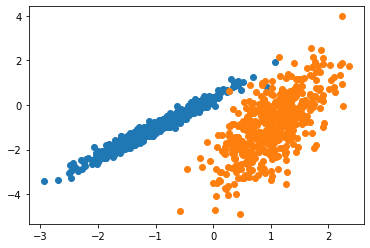

In [1]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Propagation des affinités
La propagation des affinités consiste à trouver un ensemble d'exemples qui résument le mieux les données.

" Nous avons mis au point une méthode appelée "propagation d'affinité", qui prend comme entrée des mesures de similarité entre des paires de points de données. Des messages de valeur réelle sont échangés entre les points de données jusqu'à ce qu'un ensemble d'exemples de haute qualité et de groupes correspondants émerge progressivement."

/Users/jmb/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


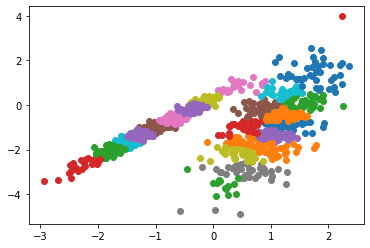

In [2]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Agglomérations de clustering 
Les agglomérations de clustering consiste à fusionner des exemples jusqu'à ce que le nombre souhaité de grappes soit atteint.

Elle fait partie d'une catégorie plus large de méthodes de regroupement hiérarchique et vous pouvez en apprendre davantage ici : Regroupement hiérarchique, Wikipédia.

Elle est mise en œuvre via la classe AgglomerativeClustering et la principale configuration à régler est l'ensemble "n_clusters", une estimation du nombre de clusters dans les données, par exemple 2.

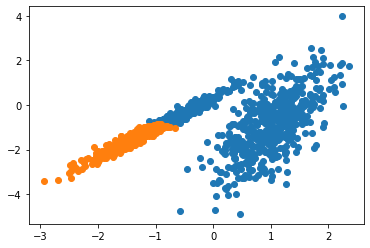

In [3]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# BIRCH 
BIRCH Clustering (BIRCH est l'abréviation de Balanced Iterative Reducing and Clustering using
Hiérarchies) consiste à construire une structure arborescente dont on extrait les centroïdes des grappes.

BIRCH regroupe de manière incrémentale et dynamique les points de données métriques multidimensionnelles entrants pour essayer de produire une mise en grappes de la meilleure qualité possible avec les ressources disponibles (c'est-à-dire la mémoire disponible et les contraintes de temps).

- BIRCH : Une méthode efficace de mise en grappes de données pour les grandes bases de données, 1996.

La technique est décrite dans le document :

BIRCH : An efficient data clustering method for large databases (Une méthode efficace de mise en grappes des données pour les grandes bases de données), 1996.
Elle est implémentée via la classe Birch et la principale configuration à régler est les hyperparamètres "seuil" et "n_clusters", ce dernier fournissant une estimation du nombre de clusters.

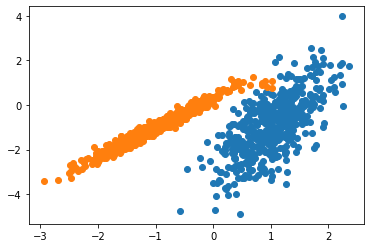

In [4]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# DBSCAN
Le regroupement DBSCAN (DBSCAN est l'abréviation de Density-Based Spatial Clustering of Applications with Noise) consiste à trouver des zones à haute densité dans le domaine et à étendre ces zones de l'espace de caractéristiques autour d'elles sous forme de grappes.

... nous présentons le nouvel algorithme de mise en grappes DBSCAN qui repose sur une notion de grappes basée sur la densité et qui est conçu pour découvrir des grappes de forme arbitraire. DBSCAN ne nécessite qu'un seul paramètre d'entrée et aide l'utilisateur à déterminer une valeur appropriée pour celui-ci

- Un algorithme basé sur la densité pour découvrir des grappes dans de grandes bases de données spatiales avec du bruit, 1996.

La technique est décrite dans l'article :

A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise (Un algorithme basé sur la densité pour découvrir des grappes dans de grandes bases de données spatiales avec du bruit), 1996.
Elle est implémentée via la classe DBSCAN et la principale configuration à régler est les hyperparamètres "eps" et "min_samples".

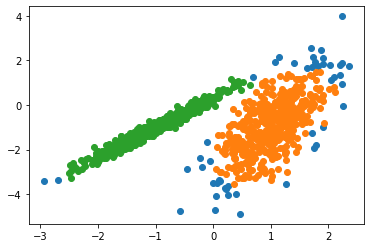

In [5]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# K-Means
Le clustering K-Means est peut-être l'algorithme de clustering le plus connu et implique l'attribution d'exemples aux clusters dans le but de minimiser la variance au sein de chaque cluster.

L'objectif principal de cet article est de décrire un processus de partitionnement d'une population à N dimensions en k ensembles sur la base d'un échantillon. Ce processus, appelé "moyenne k", semble donner des partitions raisonnablement efficaces au sens de la variance intra-classe.

- Quelques méthodes de classification et d'analyse des observations multivariées, 1967.

La technique est décrite ici : clustering k-means, Wikipedia.

Elle est implémentée via la classe KMeans et la principale configuration à régler est l'hyperparamètre "n_clusters" réglé sur le nombre estimé de clusters dans les données.

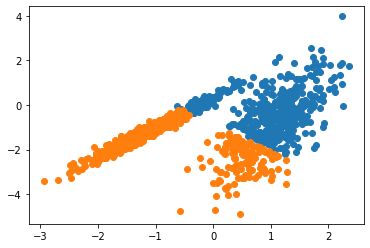

In [6]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Mini-batch K-Means
Mini-Batch K-Means est une version modifiée de k-means qui permet de mettre à jour les centroïdes des grappes en utilisant des mini-batchs d'échantillons plutôt que l'ensemble des données, ce qui peut rendre le processus plus rapide pour les grands ensembles de données, et peut-être plus robuste au bruit statistique.

... nous proposons d'utiliser l'optimisation par mini lots pour la mise en grappes de k-means. Cela réduit le coût de calcul par ordre de grandeur par rapport à l'algorithme classique par lots tout en donnant des solutions nettement meilleures que la descente de gradient stochastique en ligne.

- Clustering K-Means à l'échelle du Web, 2010.

La technique est décrite dans l'article :

Web-Scale K-Means Clustering, 2010.
Elle est mise en œuvre via la classe MiniBatchKMeans et la principale configuration à régler est l'hyperparamètre "n_clusters" réglé sur le nombre estimé de clusters dans les données.

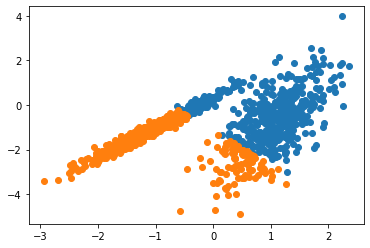

In [7]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MiniBatchKMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Mean shift
Le regroupement par Mean shift implique de trouver et d'adapter les centroïdes en fonction de la densité des exemples dans l'espace des caractéristiques.

Nous prouvons pour des données discrètes la convergence d'une procédure récursive de Mean shift vers le point stationnaire le plus proche de la fonction de densité sous-jacente et donc son utilité pour détecter les modes de la densité.

- Mean shift : Une approche robuste de l'analyse de l'espace des traits, 2002.

La technique est décrite dans l'article :

Mean shift : A robust approach towards feature space analysis, 2002.
Elle est mise en œuvre via la classe MeanShift et la principale configuration à régler est l'hyperparamètre "bande passante".

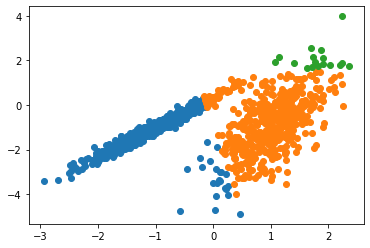

In [8]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# OPTICS
Le clustering OPTICS (où OPTICS est l'abréviation de Ordering Points To Identify the Clustering Structure) est une version modifiée du DBSCAN décrit ci-dessus.

Nous introduisons un nouvel algorithme pour l'analyse des grappes qui ne produit pas explicitement une mise en grappes d'un ensemble de données, mais qui crée plutôt un ordre augmenté de la base de données représentant sa structure de mise en grappes basée sur la densité. Cet ordonnancement des grappes contient des informations qui sont équivalentes aux grappes basées sur la densité correspondant à un large éventail de paramètres.

- OPTICS : points d'ordonnancement pour identifier la structure des grappes, 1999.

La technique est décrite dans l'article :

OPTICS : ordering points to identify the clustering structure, 1999.
Elle est mise en œuvre via la classe OPTICS et la principale configuration à régler est celle des hyperparamètres "eps" et "min_samples".

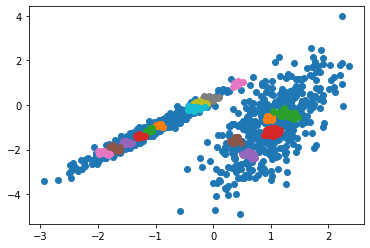

In [9]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Regroupement spectral
Le regroupement spectral est une classe générale de méthodes de regroupement, tirées de l'algèbre linéaire.

Une alternative prometteuse qui a récemment émergé dans un certain nombre de domaines est l'utilisation de méthodes spectrales pour la mise en grappes. Ici, on utilise les vecteurs propres supérieurs d'une matrice dérivée de la distance entre des points.

- Sur le clustering spectral : Analysis and an algorithm, 2002.

La technique est décrite dans l'article :

On Spectral Clustering : Analysis and an algorithm, 2002.
Elle est mise en œuvre via la classe SpectralClustering et la principale classe Spectral Clustering est une classe générale de méthodes de clustering, tirée de l'algèbre linéaire. à accorder est l'hyperparamètre "n_clusters" utilisé pour spécifier le nombre estimé de clusters dans les données.

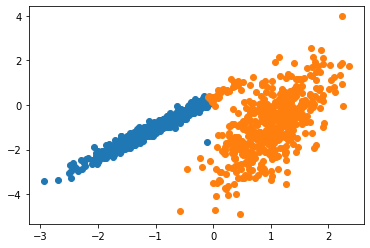

In [10]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Modèle de mélange gaussien
Un modèle de mélange gaussien résume une fonction de densité de probabilité multivariée avec un mélange de distributions de probabilité gaussiennes comme son nom l'indique.

Pour en savoir plus sur le modèle, voir : Modèle de mélange, Wikipédia.

Il est implémenté via la classe GaussianMixture et la principale configuration à régler est l'hyperparamètre "n_clusters" utilisé pour spécifier le nombre estimé de clusters dans les données.

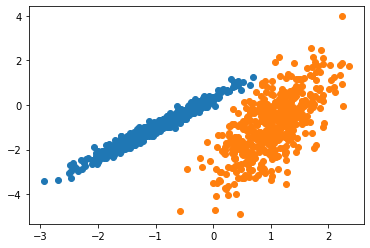

In [11]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()